Cargar librerías

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ciclos for:

Tienen la siguiente estructura:

```python
for i in range(10):
    print(i)
```

Es decir, 

```
por cada valor i en una secuencia/lista/hasta un número
    hacer algo con i
```

In [36]:
# ciclos for
for i in range(5):
    print(i, i**2)

0 0
1 1
2 4
3 9
4 16


Control de flujo condicional:

```python
if condicion:
    hacer_algo()
elif otra_condicion:
    hacer_otra_cosa()
else:
    hacer_algo_mas()
```

In [37]:
for i in range(5):
    if i % 2 == 0: # Si i es par
        print(f"{i} es par")
    elif i % 3 == 0: # Si i es múltiplo de 3
        print(f"{i} es múltiplo de 3")
    else:
        print(f"{i} es impar y no es múltiplo de 3")

0 es par
1 es impar y no es múltiplo de 3
2 es par
3 es múltiplo de 3
4 es par


Funciones definidas por el usuario:

```python
def nombre_de_la_funcion(param1, param2):
    # hacer algo con param1 y param2
    return resultado
```

In [38]:
def add(a, b):
    return a + b

# usar la función
print(add(3, 5))

8


In [39]:
def check_even_odd(num):
    if num % 2 == 0:
        return "par"
    else:
        return "impar"

print(check_even_odd(10))  # Output: par
print(check_even_odd(7))   # Output: impar


par
impar


Cargar datos desde un archivo CSV:

```python
import pandas as pd
data = pd.read_csv('ruta/al/archivo.csv')
```

In [40]:
# los dos puntos '../data/' indican que el archivo está en el directorio padre
# respecto al directorio actual del script
# (es decir, un nivel arriba en la jerarquía de carpetas)
datos = pd.read_csv('../data/spring-mass.csv')
print(datos.head()) # Muestra las primeras filas del DataFrame

   mass  elong
0    50  1.000
1   100  1.875
2   150  2.750
3   200  3.250
4   250  4.375


Graficar datos:

```python
import matplotlib.pyplot as plt
plt.scatter(data['columna_x'], data['columna_y'])
plt.xlabel('Etiqueta X')
plt.ylabel('Etiqueta Y')
plt.title('Título del Gráfico')
plt.show()
```

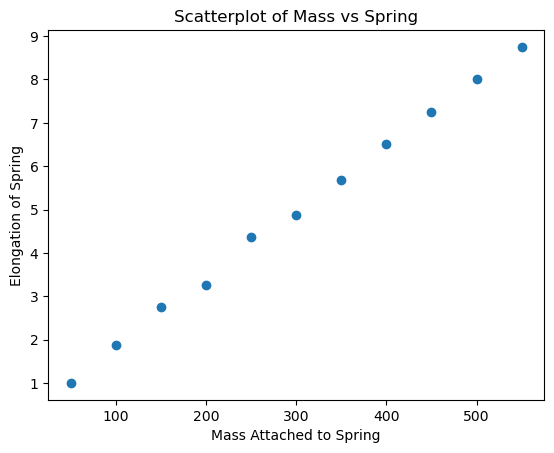

In [41]:
plt.scatter(datos['mass'], datos['elong'])
plt.xlabel('Mass Attached to Spring')
plt.ylabel('Elongation of Spring')
plt.title('Scatterplot of Mass vs Spring')
plt.show()

**Modelo simple de resorte**

Podemos intentar modelar este comportamiento. La asunción es que la fuerza que ejerce el resorte es proporcional a su elongación:
$$F = k \cdot x$$
donde:
- \(F\) es la fuerza (en Newtons, N)
- \(k\) es la constante del resorte (en N/m)
- \(x\) es la elongación del resorte (en metros, m)

Podemos asumir lo más simple: que $k$ es una pendiente y no existe ruido en los datos. En ese caso, sabemos que la pendiente es la razón de cambio entre dos puntos en una línea recta:

$$\text{slope} = k = \frac{y_2 - y_1}{x_2 - x_1}$$


In [42]:
y1 = datos['elong'].iloc[0] # primer valor de elong
y2 = datos['elong'].iloc[-1] # último valor de elong
x1 = datos['mass'].iloc[0] # primer valor de mass
x2 = datos['mass'].iloc[-1] # último valor de mass
k = (y2 - y1) / (x2 - x1) # pendiente
print(f"La pendiente es {k}")

La pendiente es 0.0155


¿Cómo podemos evaluar si esta aproximación es buena o, al menos, decente? Podemos graficar la línea que resulta de usar esta pendiente y ver qué tan bien se ajusta a los datos.

Text(0.5, 1.0, 'Scatterplot of Mass vs Spring with Best Fit Line')

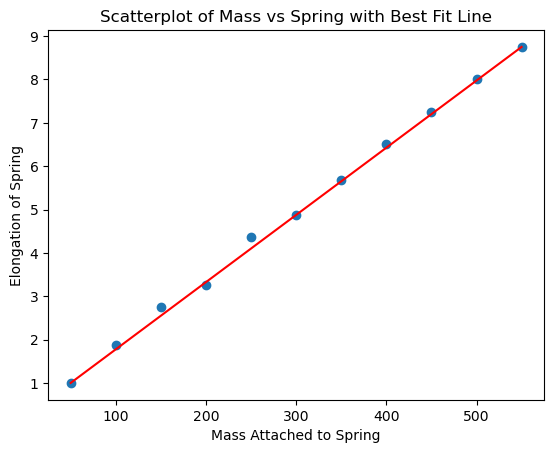

In [43]:
# creamos un vector de valores de x
x_vals = np.linspace(datos['mass'].min(), datos['mass'].max(), 100)
# y calculamos los valores correspondientes de y usando la pendiente k
y_vals = k * (x_vals - x1) + y1
# graficamos los datos originales
plt.scatter(datos['mass'], datos['elong'], label='Datos Originales')
# y la línea de mejor ajuste
plt.plot(x_vals, y_vals, color='red', label='Línea de Mejor Ajuste')
plt.xlabel('Mass Attached to Spring')
plt.ylabel('Elongation of Spring')
plt.title('Scatterplot of Mass vs Spring with Best Fit Line')

### La forma punto-pendiente de una línea recta

La ecuación que usamos:
```python
y_vals = k * (x_vals - x1) + y1
```

Es la forma "punto-pendiente" de una línea recta. Esta forma es:

$y - y_1 = k(x - x_1)$

donde:
- $(x_1, y_1)$ es un punto conocido por el que pasa la línea
- $k$ es la pendiente
- $(x, y)$ son los puntos de la línea

Al despejar $y$ obtenemos:

$y = k(x - x_1) + y_1$

Esta forma es útil porque:
1. Garantiza que la línea pase por el punto $(x_1, y_1)$
2. Mantiene la pendiente $k$ que calculamos
3. Nos permite calcular cualquier punto $y$ en la línea dado un valor $x$